### 결정 트리 : 레드 와인과 화이트 와인 분류하기

In [1]:
import pandas as pd

wine = pd.read_csv("https://bit.ly/wine_csv_data")

In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
data = wine[['alcohol', 'sugar','pH']].to_numpy()
target = wine[['class']].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [6]:
print(data.shape, train_input.shape, test_input.shape)

(6497, 3) (5197, 3) (1300, 3)


In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

##### 기존의 로지스틱 회귀

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target)) # train 데이터에 대해서도 낮음 -> 과소 적합
print(lr.score(test_scaled, test_target))
print(lr.coef_, lr.intercept_)

0.7808350971714451
0.7776923076923077
[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### 결정 트리 : 전처리 필요 X
![](../image/결정트리.png)


In [9]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


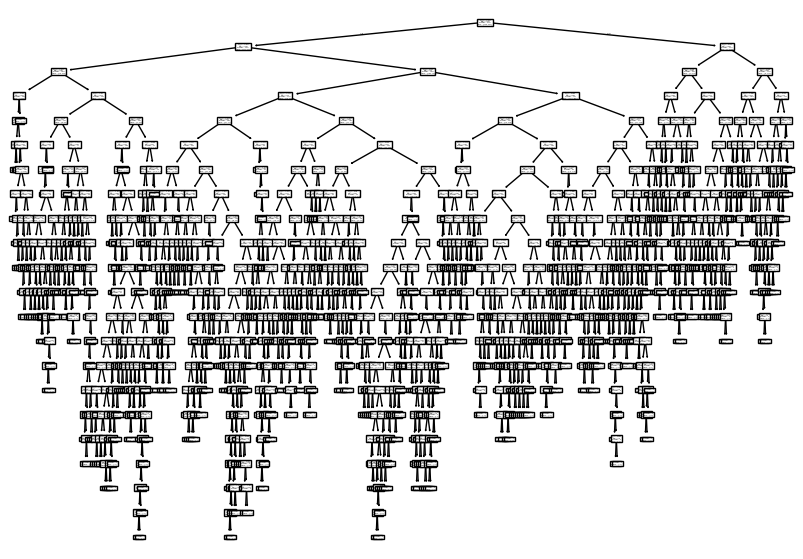

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

[Text(0.5, 0.8333333333333334, 'sugar <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(0.25, 0.5, 'sugar <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'sugar <= 0.204\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

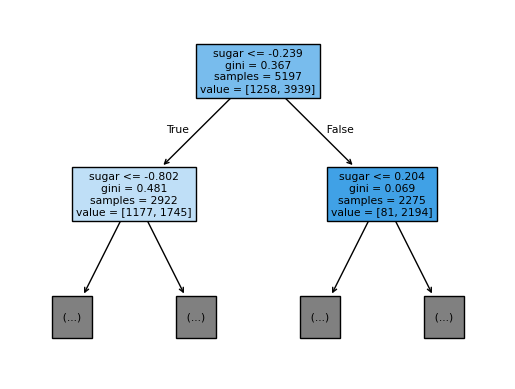

In [11]:
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar','pH'])
# 테스트 조건
# 불순도(gini)
# 총 샘플 수(samples)
# 클래스별 샘플 수(value) : 음성 클래스, 양성 클래스의 개수

- $지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)$
- 부모 노드의 불순도 - 자식 노드의 불순도가 가장 크게 나오는 방향으로 노드를 분할
- 불순도 차이(정보 이득) : 부모의 불순도 -  (왼쪽 노드 샘플 수 /부모 노드 샘플 수) * 왼쪽 노드 불순도 = (오른쪽 노드 샘플 수 / 부모 노드 샘플 수) * 오른쪽 노드 불순도

가지치기 : 과대 적합을 막기 위해 중간에 끊음(max_depth를 이용)

In [12]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


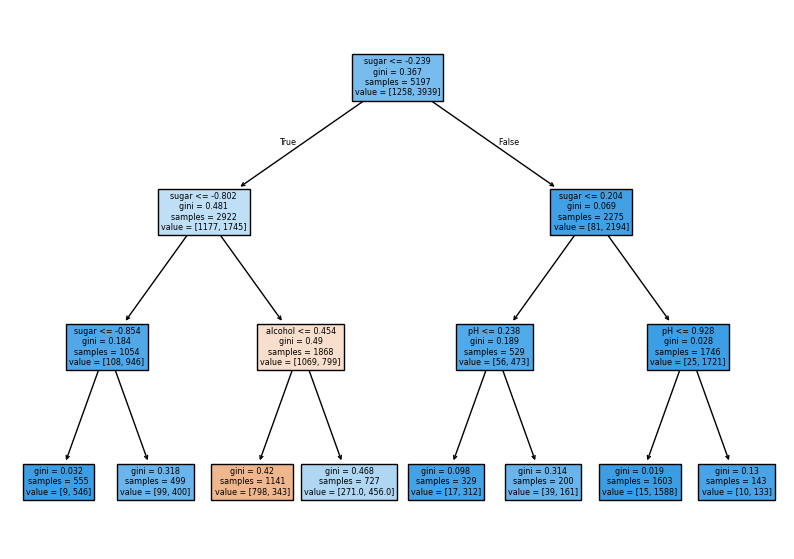

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar','pH'])
plt.show()

In [14]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


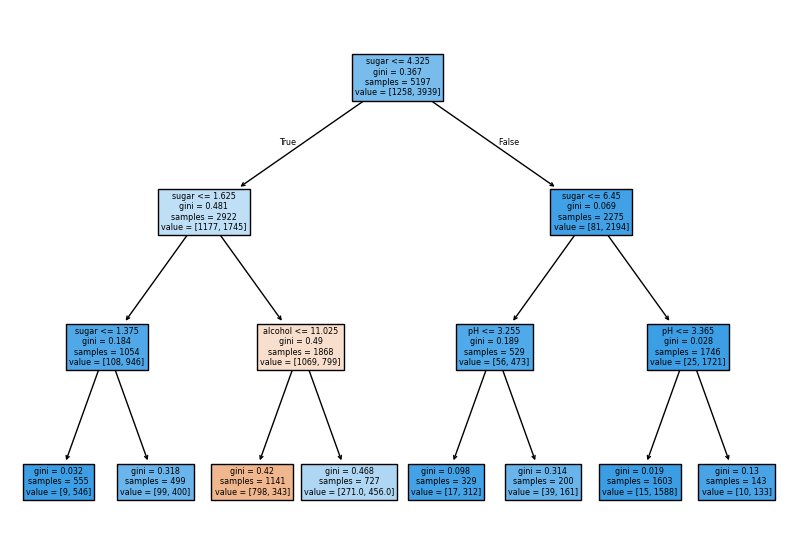

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar','pH'])
plt.show()

In [16]:
print(dt.feature_importances_) # 특성 중요도

[0.12345626 0.86862934 0.0079144 ]


min_impurity_decrease : 어떤 노드의 정보 이득 * 노드의 샘플 수 / 전체 샘플수 값이 이 매개변수보다 작으면 더 이상 분할 X(가지치기 방법)

0.8874350586877044
0.8615384615384616


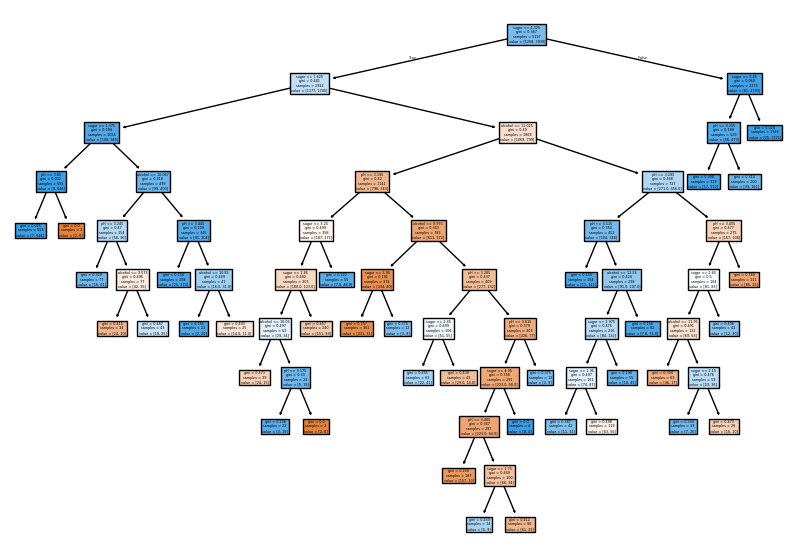

In [17]:
dt = DecisionTreeClassifier(random_state = 42, min_impurity_decrease=0.0005)

dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))


plt.figure(figsize=(10, 7))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar','pH'])
plt.show()

### 교차 검증과 그리드 서치

#### 검증 세트 : 테스트 세트를 사용하지 않고 이를 측정하는 방법
1. 훈련 세트, 검증 세트, 테스트 세트로 나눔
2. 훈련 세트로 훈련, 검증 세트를 평가로 해서 하이퍼 파라미터 튜닝
3. 훈련 세트, 검증 세트를 합쳐서 모델을 다시 훈련
4. 최종적으로 테스트 세트로 평가

In [18]:
import pandas as pd

wine = pd.read_csv("https://bit.ly/wine_csv_data")

data = wine[['alcohol', 'sugar','pH']].to_numpy()
target = wine[['class']].to_numpy()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [19]:
sub_input, val_input, sub_target, val_target = train_test_split(test_input, test_target, test_size=0.2, random_state=42)

print(sub_input.shape, val_input.shape)

(1040, 3) (260, 3)


In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.996921300750433
0.8653846153846154
0.8307692307692308


#### k-폴드 교차 검증 : 훈련 세트를 k 부분으로 나눠서 교차 검증 수행(딥러닝에서는 사용 못함)
![](../image/k-폴드_교차검증.png)
검증 세트를 이용해서 하이퍼 파라미터 튜닝

In [21]:
from sklearn.model_selection import cross_validate # 훈련 세트를 섞지 않음 -> 분할기 필요

scores = cross_validate(dt, train_input, train_target) # 교차 검증, 훈련 세트 전체를 전달, 기본적으로 5폴드 사용
print(scores)
# fit_time : 모델을 훈련하는 시간
# score_time : 검증하는 시간
# test_score : 교차 검증의 최종 점수

{'fit_time': array([0.08399725, 0.00499845, 0.00399852, 0.00600052, 0.00400114]), 'score_time': array([0.00100064, 0.00100017, 0.0010004 , 0.        , 0.00099993]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


cross_validate : 분할기(splitter) 사용
- 회귀 모델일 경우 : KFold 분할기 사용
- 분류 모델일 경우 : StratifiedKFold 분할기 사용 - 클래스가 고르게 나눠지게 분할

In [22]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold()) # 10%를 검증 세트로 하려면 그냥 10만 해도 OK
scores

{'fit_time': array([0.00499725, 0.00400162, 0.00400162, 0.00400043, 0.00399971]),
 'score_time': array([0.        , 0.00099754, 0.00099874, 0.        , 0.0010016 ]),
 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

In [23]:
import numpy as np

# 훈련 세트를 섞은 후 10-폴드 교차 검증 수행
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_validate(dt, train_input, train_target, cv=splitter)

print(np.mean(scores['test_score']))

0.8574181117533719


#### 하이퍼 파라미터 튜닝
- 여러 개의 매개변수를 동시에 바꿔가며 최적의 값을 찾아야 함
- 매개변수가 많아지면 문제가 복잡
- => 그리드 서치(Grid Search) 사용
- 매개변수의 값이 수치일 때 값의 범위나 간격을 정하기 어려움, 너무 많은 매개변수 조건이 있을 때 오래 걸림
- => 랜덤 서치(Random Search) 사용 
<hr>

- GridSearchCV : 하이퍼 파라미터 탐색과 교차 검증을 한 번에 수행
- RandomizedSearchCV : 매개변수 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링할 수 있는 확률 분포 객체를 전달(scipy 이용)

##### GridSearch

In [24]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs = -1) # n_jobs : 병렬 수행(코어 개수, -1 : 가능한 모든 코어)

In [25]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [26]:
dt = gs.best_estimator_ # 최적의 매개변수를 사용한 모델
dt_params = gs.best_params_ # 최적의 매개변수

print(dt.score(train_input, train_target), dt_params)
print(gs.cv_results_['mean_test_score']) # 5번의 교차 검증으로 얻은 점수

0.9615162593804117 {'min_impurity_decrease': 0.0001}
[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [27]:
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
          'max_depth' : range(5,20,1),
          'min_samples_split' : range(2, 100, 10)} # min_samples_split : 노드를 나누기 위한 최소 샘플 수

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs = -1) # n_jobs : 병렬 수행(코어 개수, -1 : 가능한 모든 코어)
gs.fit(train_input, train_target)

print(gs.best_params_)
print(gs.score(train_input, train_target))

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}
0.892053107562055


##### RandomSearch

In [28]:
from scipy.stats import uniform, randint # 균등분포에서 샘플링
# randint : 정숫값을 뽑음
# uniform : 실수값을 뽑음

rgen = randint(0, 10) # 0 ~ 10사이의 범위를 갖는 randint 객체
rgen.rvs(10)

array([7, 1, 9, 4, 9, 3, 2, 3, 7, 1])

In [29]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([101, 102, 104,  90, 101, 107, 100, 108,  89,  98]))

In [30]:
ugen = uniform(0.1)
ugen.rvs(10)

array([0.7624159 , 0.91498234, 0.16968332, 0.21677029, 0.16071559,
       0.56506878, 0.68912845, 0.47374996, 0.61682694, 0.66503935])

In [31]:
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
          'max_depth' : range(5,20,1),
          'min_samples_split' : randint(2, 25),
          'min_samples_leaf': randint(1, 25)}

In [32]:
from  sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42) # n_iter : 샘플링을 100번 함

gs.fit(train_input, train_target)

print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

{'max_depth': 18, 'min_impurity_decrease': 0.0004, 'min_samples_leaf': 5, 'min_samples_split': 6}
0.8689644258532614


c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [33]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.8569230769230769


### 트리의 앙상블
##### 정형 데이터에서 가장 뛰어난 성과 : 앙상블 학습(결정 트리 기반)
- 사이킷런
    - 랜덤 포레스트 : 부트스트랩 샘플 사용, 대표 앙상블 학습 알고리즘
    - 엑스트라 트리 : 결정 트리의 노드를 랜덤하게 분할
    - 그레이디언트 부스팅 : 이진 트리의 손실을 보완하는 식으로 얕은 결정 트리를 연속하여 추가
    - 히스토그램 기반 그레이디언트 부스팅 : 훈련 데이터를 256개 정수 구간으로 나누어 빠르고 높은 성능을 냄

- 그 외 라이브러리
    - XGBoost
    - LightGBM

#### 랜덤 포레스트 : 결정 트리를 랜덤하게 만들어 결정 트리의 숲을 만듦 → 각 결정 트리의 예측을 사용해 최종 예측을 만듦(여러 개의 결정 트리를 합침)
![](../image/랜덤%20포레스트.jpg)
- 분류일 경우 : 클래스별 확률 = 각 결정 트리의 클래스별 확률 / 트리 개수
- 회귀일 경우 : 예측값 = 각 결정 트리의 예측값 / 트리 개수
<hr/>


- 부트스트랩 샘플 : 훈련 데이터에서 랜덤하게 샘플을 추출해 훈련 데이터를 만듦(샘플이 중복되어 추출될 수 있음, 복원 추출)

In [34]:
import pandas as pd

wine = pd.read_csv("https://bit.ly/wine_csv_data")
data = wine[['alcohol', 'sugar','pH']].to_numpy()
target = wine[['class']].to_numpy()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)

scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [36]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


부트스트랩 샘플에 포함되지 않은 샘플(OOB)를 가지고 결정 트리를 평가(검증 세트의 역할)

In [37]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
rf.oob_score_

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8934000384837406

#### 엑스트라 트리 : 부트스트랩 샘플을 사용하지 않고 각 결정 트리를 만들 때 전체 훈련 세트를 사용
노드를 분할할 때 가장 좋은 분할을 찾는 것이 아니라 무작위로 분할(여기서 과대적합 방지)

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


#### 그레이디언트 부스팅 : 깊이가 얕은 결정 트리(max_depth <= 3)를 사용해 이전 트리의 오차를 보완하는 방식으로 앙상블(가장 좋음)
- 경사 하강법을 사용하여 트리를 앙상블에 추가
- 분류 : 로지스틱 손실 함수 사용
- 회귀 : 평균 제곱 오차 함수 사용
<hr/>

-  손실 함수의 값(실수값)을 낮추도록 트리를 추가

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [40]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42) # 천천히 학습하도록 learning_rate를 0.2로 함, 트리를 순서대로 추가해야 해서 n_jobs이 없음, n_estimators : 트리의 개수
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [41]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.15882696 0.6799705  0.16120254]


#### 히스토그램 기반 그레이디언트 부스팅 : 머신러닝 알고리즘 중 가장 인기가 높음
- 입력 특성을 256개의 구간으로 나눔 → 256개의 구간 중 하나를 떼어 놓고 누락된 값을 위해 사용 → 누락된 특성 전처리 필요 X 

In [42]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expec

0.9321723946453317 0.8801241948619236


In [ ]:
from sklearn.inspection import permutation_importance # 치환 중요도 : 각 속성 별로 랜덤으로 섞어서 각 속성별 정확도 출력 -> 가장 정확도가 크게 떨어진 속성이 가장 중요함

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1) # 특성마다 10번씩 섞음

print(result.importances_mean) # 2번째 속성을 섞을 때 가장 많이 차이남 -> 2번째 속성이 중요

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.08876275 0.23438522 0.08027708]


In [49]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)

print(result.importances_mean)

print(hgb.score(test_input, test_target))

[0.05969231 0.20238462 0.049     ]
0.8723076923076923


사이킷런 이외의 그레이디언트 부스팅 알고리즘을 구현한 라이브러리
- XGBoost : 사이킷런의 cross_validate() 함수와 함께 사용 가능(tree_method = 'hist'로 지정하면 히스토그램 기반 그레이디언트 부스팅 사용 가능)
- LightGBM : 사이킷런의 cross_validate() 함수와 함께 사용 가능

In [52]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686


In [56]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs = -1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
